(functions)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# توابع

```{index} single: Python; User-defined functions
```

## مرور کلی

توابع (Functions) یکی از ساختارهای بسیار مفید هستند که تقریباً در تمام زبان‌های برنامه‌نویسی وجود دارند.

ما تاکنون با چندین تابع آشنا شده‌ایم، مانند

* تابع `sqrt()` از کتابخانه NumPy و
* تابع داخلی `print()`

در این درس ما:

1. توابع را به صورت سیستماتیک بررسی می‌کنیم و نحوه نوشتن و موارد استفاده را پوشش می‌دهیم، و
2. یاد می‌گیریم که چگونه توابع سفارشی خودمان را بسازیم.

ما از import های زیر استفاده خواهیم کرد.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## مبانی توابع

تابع یک بخش نام‌گذاری شده از یک برنامه است که یک وظیفه خاص را اجرا می‌کند.

توابع زیادی از قبل وجود دارند و ما می‌توانیم از آنها به همین شکل استفاده کنیم.

ابتدا این توابع را بررسی می‌کنیم و سپس بحث می‌کنیم که چگونه می‌توانیم توابع خودمان را بسازیم.

### توابع داخلی

پایتون تعدادی تابع **داخلی** دارد که بدون نیاز به `import` در دسترس هستند.

ما قبلاً با برخی از آنها آشنا شده‌ایم

In [2]:
max(19, 20)

20

In [3]:
print('foobar')

foobar


In [4]:
str(22)

'22'

In [5]:
type(22)

int

لیست کامل توابع داخلی پایتون در [اینجا](https://docs.python.org/3/library/functions.html) موجود است.

### توابع شخص ثالث

اگر توابع داخلی نیاز ما را پوشش ندهند، یا باید توابع را import کنیم یا توابع خودمان را بسازیم.

نمونه‌هایی از import کردن و استفاده از توابع در {doc}`درس قبلی <python_by_example>` آورده شده است.

در اینجا نمونه دیگری داریم که بررسی می‌کند آیا یک سال خاص، سال کبیسه است یا خیر:

In [6]:
import calendar
calendar.isleap(2024)

True

## تعریف توابع

در بسیاری از موارد، توانایی تعریف توابع خودمان مفید است.

بیایید با بحث در مورد نحوه انجام آن شروع کنیم.

### نحو پایه

در اینجا یک تابع بسیار ساده پایتون داریم که تابع ریاضی $f(x) = 2 x + 1$ را پیاده‌سازی می‌کند

In [7]:
def f(x):
    return 2 * x + 1

حالا که این تابع را تعریف کردیم، بیایید آن را *فراخوانی* کنیم و بررسی کنیم که آیا کاری که انتظار داریم را انجام می‌دهد:

In [8]:
f(1)   

3

In [9]:
f(10)

21

در اینجا یک تابع طولانی‌تر داریم که قدر مطلق یک عدد داده شده را محاسبه می‌کند.

(چنین تابعی قبلاً به عنوان یک تابع داخلی وجود دارد، اما بیایید برای تمرین، تابع خودمان را بنویسیم.)

In [10]:
def new_abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

بیایید نحو را در اینجا بررسی کنیم.

* `def` یک کلمه کلیدی پایتون است که برای شروع تعریف توابع استفاده می‌شود.
* `def new_abs_function(x):` نشان می‌دهد که نام تابع `new_abs_function` است و یک آرگومان واحد `x` دارد.
* کد تورفتگی‌دار یک بلوک کد است که *بدنه تابع* نامیده می‌شود.
* کلمه کلیدی `return` نشان می‌دهد که `abs_value` شیء‌ای است که باید به کد فراخوانی‌کننده برگردانده شود.

تمام این تعریف تابع توسط مفسر پایتون خوانده می‌شود و در حافظه ذخیره می‌شود.

بیایید آن را فراخوانی کنیم تا بررسی کنیم که کار می‌کند:

In [11]:
print(new_abs_function(3))
print(new_abs_function(-3))

3
3


توجه کنید که یک تابع می‌تواند تعداد دلخواهی دستور `return` داشته باشد (از جمله صفر).

اجرای تابع زمانی که به اولین return برسد، خاتمه می‌یابد و این امکان را می‌دهد که کدهایی مانند مثال زیر بنویسیم

In [12]:
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'

(نوشتن توابع با چندین دستور return معمولاً توصیه نمی‌شود، زیرا می‌تواند دنبال کردن منطق را سخت کند.)

توابعی که دستور return ندارند، به طور خودکار شیء خاص پایتون به نام `None` را برمی‌گردانند.

(pos_args)=
### آرگومان‌های کلیدواژه‌ای

```{index} single: Python; keyword arguments
```

در {ref}`درس قبلی <python_by_example>`، با عبارت زیر مواجه شدید

```{code-block} python3
:class: no-execute

plt.plot(x, 'b-', label="white noise")
```

در این فراخوانی تابع `plot` کتابخانه Matplotlib، توجه کنید که آخرین آرگومان با نحو `name=argument` ارسال می‌شود.

این را یک *آرگومان کلیدواژه‌ای* می‌نامند، که `label` کلیدواژه است.

آرگومان‌های غیر کلیدواژه‌ای را *آرگومان‌های موضعی* می‌نامند، زیرا معنای آنها با ترتیب مشخص می‌شود

* `plot(x, 'b-')` با `plot('b-', x)` متفاوت است

آرگومان‌های کلیدواژه‌ای به ویژه زمانی مفید هستند که یک تابع آرگومان‌های زیادی دارد، در این صورت به خاطر سپردن ترتیب صحیح سخت است.

شما می‌توانید آرگومان‌های کلیدواژه‌ای را در توابع تعریف شده توسط کاربر بدون مشکل به کار ببرید.

مثال بعدی نحو را نشان می‌دهد

In [13]:
def f(x, a=1, b=1):
    return a + b * x

مقادیر آرگومان کلیدواژه‌ای که در تعریف `f` ارائه کردیم، به مقادیر پیش‌فرض تبدیل می‌شوند

In [14]:
f(2)

3

آنها را می‌توان به شکل زیر تغییر داد

In [15]:
f(2, a=4, b=5)

14

### انعطاف‌پذیری توابع پایتون

همانطور که در {ref}`درس قبلی <python_by_example>` بحث کردیم، توابع پایتون بسیار انعطاف‌پذیر هستند.

به طور خاص

* هر تعداد تابع می‌تواند در یک فایل معین تعریف شود.
* توابع می‌توانند (و اغلب) در داخل توابع دیگر تعریف شوند.
* هر شیء می‌تواند به عنوان آرگومان به یک تابع ارسال شود، از جمله توابع دیگر.
* یک تابع می‌تواند هر نوع شیء را برگرداند، از جمله توابع.

ما در بخش‌های بعدی مثال‌هایی از اینکه چقدر ساده است که یک تابع را به یک تابع دیگر ارسال کنیم، ارائه خواهیم داد.

### توابع یک خطی: `lambda`

```{index} single: Python; lambda functions
```

کلمه کلیدی `lambda` برای ایجاد توابع ساده در یک خط استفاده می‌شود.

به عنوان مثال، تعریف‌های زیر

In [16]:
def f(x):
    return x**3

و

In [17]:
f = lambda x: x**3

کاملاً معادل هستند.

برای اینکه ببینیم چرا `lambda` مفید است، فرض کنید می‌خواهیم $\int_0^2 x^3 dx$ را محاسبه کنیم (و حساب دبیرستانمان را فراموش کرده‌ایم).

کتابخانه SciPy تابعی به نام `quad` دارد که این محاسبه را برای ما انجام می‌دهد.

نحو تابع `quad` به صورت `quad(f, a, b)` است که `f` یک تابع و `a` و `b` اعداد هستند.

برای ایجاد تابع $f(x) = x^3$ می‌توانیم از `lambda` به شکل زیر استفاده کنیم

In [18]:
from scipy.integrate import quad

quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

در اینجا تابع ایجاد شده توسط `lambda` *ناشناس* نامیده می‌شود زیرا هرگز نامی به آن داده نشده است.

### چرا توابع بنویسیم؟

توابع تعریف شده توسط کاربر برای بهبود وضوح کد شما از طریق موارد زیر مهم هستند:

* جداسازی رشته‌های مختلف منطق
* تسهیل استفاده مجدد از کد

(نوشتن یک چیز دو بار [تقریباً همیشه ایده بدی است](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself))

ما بعداً بیشتر در این مورد صحبت خواهیم کرد.

<!-- TODO: Restore link once writing_good_code lecture is translated and merged: {doc}`بعداً <writing_good_code>` -->

## کاربردها

### نمونه‌برداری تصادفی

دوباره به این کد از {doc}`درس قبلی <python_by_example>` نگاه کنید

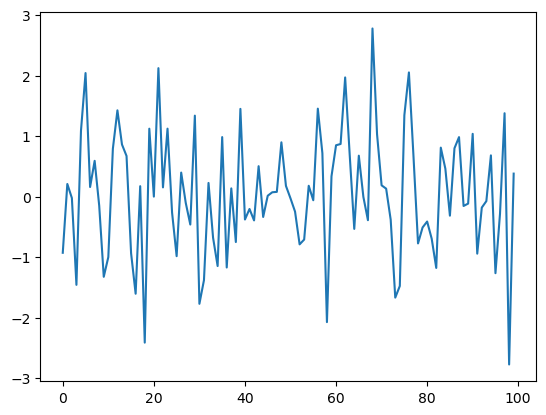

In [19]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

ما این برنامه را به دو بخش تقسیم خواهیم کرد:

1. یک تابع تعریف شده توسط کاربر که لیستی از متغیرهای تصادفی تولید می‌کند.
1. بخش اصلی برنامه که
    1. این تابع را برای دریافت داده فراخوانی می‌کند
    1. داده‌ها را رسم می‌کند

این کار در برنامه بعدی انجام می‌شود

(funcloopprog)=

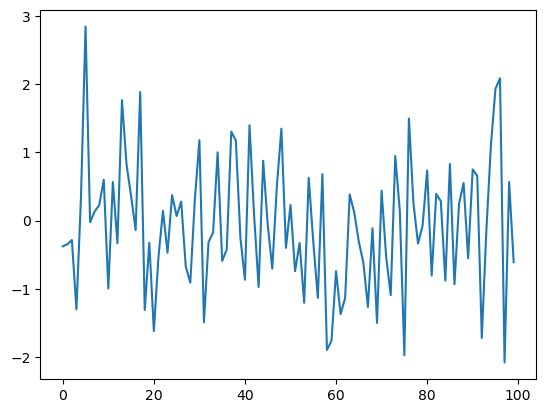

In [20]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

وقتی مفسر به عبارت `generate_data(100)` می‌رسد، بدنه تابع را با `n` برابر با 100 اجرا می‌کند.

نتیجه خالص این است که نام `data` به لیست `ϵ_values` برگردانده شده توسط تابع *متصل* می‌شود.

### اضافه کردن شرط‌ها

```{index} single: Python; Conditions
```

تابع `generate_data()` ما نسبتاً محدود است.

بیایید آن را با دادن قابلیت برگرداندن یا متغیرهای تصادفی نرمال استاندارد یا متغیرهای تصادفی یکنواخت در $(0, 1)$ بر اساس نیاز، کمی مفیدتر کنیم.

این کار در قطعه کد بعدی انجام می‌شود.

(funcloopprog2)=

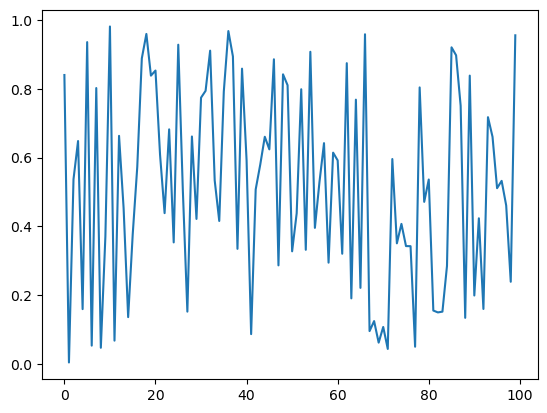

In [21]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

امیدواریم نحو عبارت if/else خود توضیح‌دهنده باشد، با تورفتگی که دوباره محدوده بلوک‌های کد را مشخص می‌کند.

نکات

* ما آرگومان `U` را به عنوان یک رشته ارسال می‌کنیم، به همین دلیل آن را به صورت `'U'` می‌نویسیم.
* توجه کنید که برابری با نحو `==` آزمایش می‌شود، نه `=`.
    * به عنوان مثال، دستور `a = 10` نام `a` را به مقدار `10` اختصاص می‌دهد.
    * عبارت `a == 10` به `True` یا `False` ارزیابی می‌شود، بسته به مقدار `a`.

حالا، چندین راه وجود دارد که می‌توانیم کد بالا را ساده کنیم.

به عنوان مثال، می‌توانیم شرط‌ها را کاملاً حذف کنیم و فقط نوع تولیدکننده مورد نظر را *به عنوان یک تابع* ارسال کنیم.

برای درک این موضوع، نسخه زیر را در نظر بگیرید.

(test_program_6)=

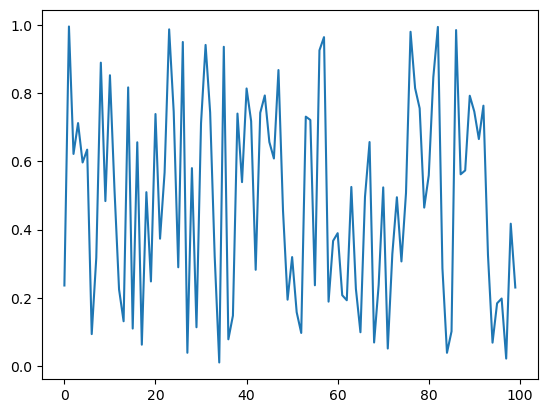

In [22]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

حالا، وقتی تابع `generate_data()` را فراخوانی می‌کنیم، `np.random.uniform` را به عنوان آرگومان دوم ارسال می‌کنیم.

این شیء یک *تابع* است.

وقتی فراخوانی تابع `generate_data(100, np.random.uniform)` اجرا می‌شود، پایتون بلوک کد تابع را با `n` برابر با 100 و نام `generator_type` "متصل" به تابع `np.random.uniform` اجرا می‌کند.

* در حالی که این خطوط اجرا می‌شوند، نام‌های `generator_type` و `np.random.uniform` "مترادف" هستند و می‌توانند به روش‌های یکسان استفاده شوند.

این اصل به طور کلی‌تر کار می‌کند---به عنوان مثال، قطعه کد زیر را در نظر بگیرید

In [23]:
max(7, 2, 4)   # max() is a built-in Python function

7

In [24]:
m = max
m(7, 2, 4)

7

در اینجا ما نام دیگری برای تابع داخلی `max()` ایجاد کردیم که سپس می‌توانست به روش‌های یکسان استفاده شود.

در زمینه برنامه ما، توانایی اتصال نام‌های جدید به توابع به این معنی است که هیچ مشکلی در *ارسال یک تابع به عنوان آرگومان به تابع دیگر* وجود ندارد---همانطور که در بالا انجام دادیم.

(recursive_functions)=
## فراخوانی‌های بازگشتی تابع (پیشرفته)

```{index} single: Python; Recursion
```

این یک موضوع پیشرفته است که می‌توانید آن را رد کنید.

در عین حال، این ایده جالبی است که باید در مرحله‌ای از حرفه برنامه‌نویسی خود آن را یاد بگیرید.

اساساً، یک تابع بازگشتی تابعی است که خودش را فراخوانی می‌کند.

به عنوان مثال، مسئله محاسبه $x_t$ برای برخی از t را در نظر بگیرید که

```{math}
:label: xseqdoub

x_{t+1} = 2 x_t, \quad x_0 = 1
```

واضح است که جواب $2^t$ است.

ما می‌توانیم این را به راحتی با یک حلقه محاسبه کنیم

In [25]:
def x_loop(t):
    x = 1
    for i in range(t):
        x = 2 * x
    return x

همچنین می‌توانیم از یک راه‌حل بازگشتی استفاده کنیم، به شرح زیر

In [26]:
def x(t):
    if t == 0:
        return 1
    else:
        return 2 * x(t-1)

آنچه در اینجا اتفاق می‌افتد این است که هر فراخوانی متوالی از *فریم* خود در *پشته* استفاده می‌کند

* فریم جایی است که متغیرهای محلی یک فراخوانی تابع معین نگهداری می‌شود
* پشته حافظه‌ای است که برای پردازش فراخوانی‌های تابع استفاده می‌شود
  * یک صف First In Last Out (FILO)

این مثال تا حدودی ساختگی است، زیرا اولین راه‌حل (تکراری) معمولاً به راه‌حل بازگشتی ترجیح داده می‌شود.

ما بعداً با کاربردهای کمتر ساختگی بازگشت آشنا خواهیم شد.

(factorial_exercise)=
## تمرینات

```{exercise-start}
:label: func_ex1
```

به یاد داشته باشید که $n!$ به عنوان "$n$ فاکتوریل" خوانده می‌شود و به صورت
$n! = n \times (n - 1) \times \cdots \times 2 \times 1$ تعریف می‌شود.

ما فقط $n$ را به عنوان یک عدد صحیح مثبت در نظر می‌گیریم.

توابعی برای محاسبه این در ماژول‌های مختلف وجود دارد، اما بیایید به عنوان تمرین نسخه خودمان را بنویسیم.

به طور خاص، تابعی به نام `factorial` بنویسید به طوری که `factorial(n)` برای هر عدد صحیح مثبت $n$ مقدار $n!$ را برگرداند.

```{exercise-end}
```

```{solution-start} func_ex1
:class: dropdown
```

در اینجا یک راه‌حل است:

In [27]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(4)

24

```{solution-end}
```

```{exercise-start}
:label: func_ex2
```

[متغیر تصادفی دوجمله‌ای](https://en.wikipedia.org/wiki/Binomial_distribution) $Y \sim Bin(n, p)$ نشان‌دهنده تعداد موفقیت‌ها در $n$ آزمایش دودویی است که هر آزمایش با احتمال $p$ موفق می‌شود.

بدون هیچ import به جز `from numpy.random import uniform`، تابعی به نام `binomial_rv` بنویسید به طوری که `binomial_rv(n, p)` یک نمونه از $Y$ تولید کند.

```{hint}
:class: dropdown

اگر $U$ یکنواخت در $(0, 1)$ و $p \in (0,1)$ باشد، آنگاه عبارت `U < p` با احتمال $p$ به `True` ارزیابی می‌شود.
```

```{exercise-end}
```

```{solution-start} func_ex2
:class: dropdown
```

در اینجا یک راه‌حل است:

In [28]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

5

```{solution-end}
```

```{exercise-start}
:label: func_ex3
```

اولاً، تابعی بنویسید که یک تحقق از دستگاه تصادفی زیر را برگرداند

1. یک سکه بی‌طرفانه را 10 بار پرتاب کنید.
1. اگر شیر `k` بار یا بیشتر به طور متوالی در این دنباله حداقل یک بار رخ دهد، یک دلار پرداخت کنید.
1. در غیر این صورت، چیزی پرداخت نکنید.

ثانیاً، تابع دیگری بنویسید که همان کار را انجام دهد به جز اینکه قانون دوم دستگاه تصادفی بالا به این شکل تبدیل شود

- اگر شیر `k` بار یا بیشتر در این دنباله رخ دهد، یک دلار پرداخت کنید.

از هیچ import به جز `from numpy.random import uniform` استفاده نکنید.

```{exercise-end}
```

```{solution-start} func_ex3
:class: dropdown
```

در اینجا تابعی برای دستگاه تصادفی اول است.

In [29]:
from numpy.random import uniform

def draw(k):  # pays if k consecutive successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + 1 if U < 0.5 else 0
        print(count)    # print counts for clarity
        if count == k:
            payoff = 1

    return payoff

draw(3)

1
2
0
1
2
3
4
5
0
0


1

در اینجا تابع دیگری برای دستگاه تصادفی دوم است.

In [30]:
def draw_new(k):  # pays if k successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + ( 1 if U < 0.5 else 0 )
        print(count)
        if count == k:
            payoff = 1

    return payoff

draw_new(3)

0
1
2
2
3
4
4
4
5
5


1

```{solution-end}
```

## تمرینات پیشرفته

در تمرینات زیر، ما با هم توابع بازگشتی خواهیم نوشت.

```{exercise-start}
:label: func_ex4
```

اعداد فیبوناچی به این صورت تعریف می‌شوند

```{math}
:label: fib

x_{t+1} = x_t + x_{t-1}, \quad x_0 = 0, \; x_1 = 1
```

چند عدد اول در این دنباله $0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55$ هستند.

تابعی برای محاسبه بازگشتی $t$امین عدد فیبوناچی برای هر $t$ بنویسید.

```{exercise-end}
```

```{solution-start} func_ex4
:class: dropdown
```

در اینجا راه‌حل استاندارد است

In [31]:
def x(t):
    if t == 0:
        return 0
    if t == 1:
        return 1
    else:
        return x(t-1) + x(t-2)

بیایید آن را آزمایش کنیم

In [32]:
print([x(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


```{solution-end}
```

```{exercise-start}
:label: func_ex5
```

تابع `factorial()` از [تمرین 1](factorial_exercise) را با استفاده از بازگشت بازنویسی کنید.

```{exercise-end}
```

```{solution-start} func_ex5
:class: dropdown
```

در اینجا راه‌حل استاندارد است

In [33]:
def recursion_factorial(n):
   if n == 1:
       return n
   else:
       return n * recursion_factorial(n-1)

بیایید آن را آزمایش کنیم

In [34]:
print([recursion_factorial(i) for i in range(1, 10)])

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


```{solution-end}
```